<a href="https://colab.research.google.com/github/VinathaViswanathan/Titanic-Survival-Prediction/blob/main/Titanic_Survival_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Titanic Survival prediction with Python

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
titanic_data = pd.read_csv('/content/drive/MyDrive/Machine_Learning_Projects_Datasets/Titanic_Survical_Case_Study/train.csv')

In [ ]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Analyse the correlations

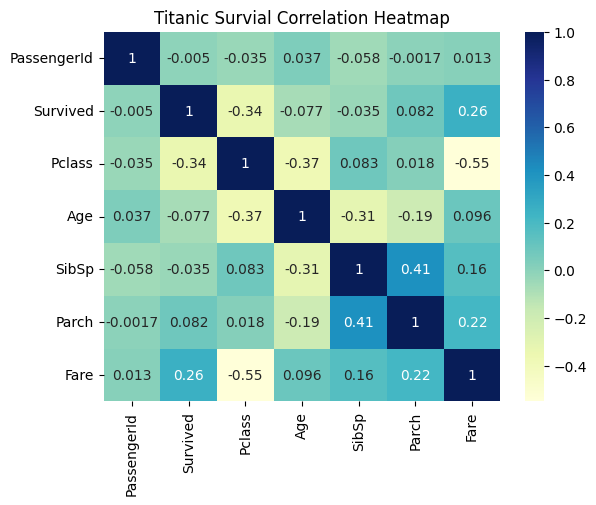

In [ ]:
# Select only numeric columns
numeric_data = titanic_data.select_dtypes(include='number')

# Plot heatmap of the correlation matrix
sns.heatmap(numeric_data.corr(), cmap="YlGnBu", annot=True)
plt.title("Titanic Survial Correlation Heatmap")
plt.show()

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2)
for train_indicies, test_indicies in split.split(titanic_data, titanic_data[['Survived', 'Pclass', 'Sex']]):
  strat_train_set = titanic_data.loc[train_indicies]
  strat_test_set = titanic_data.loc[test_indicies]

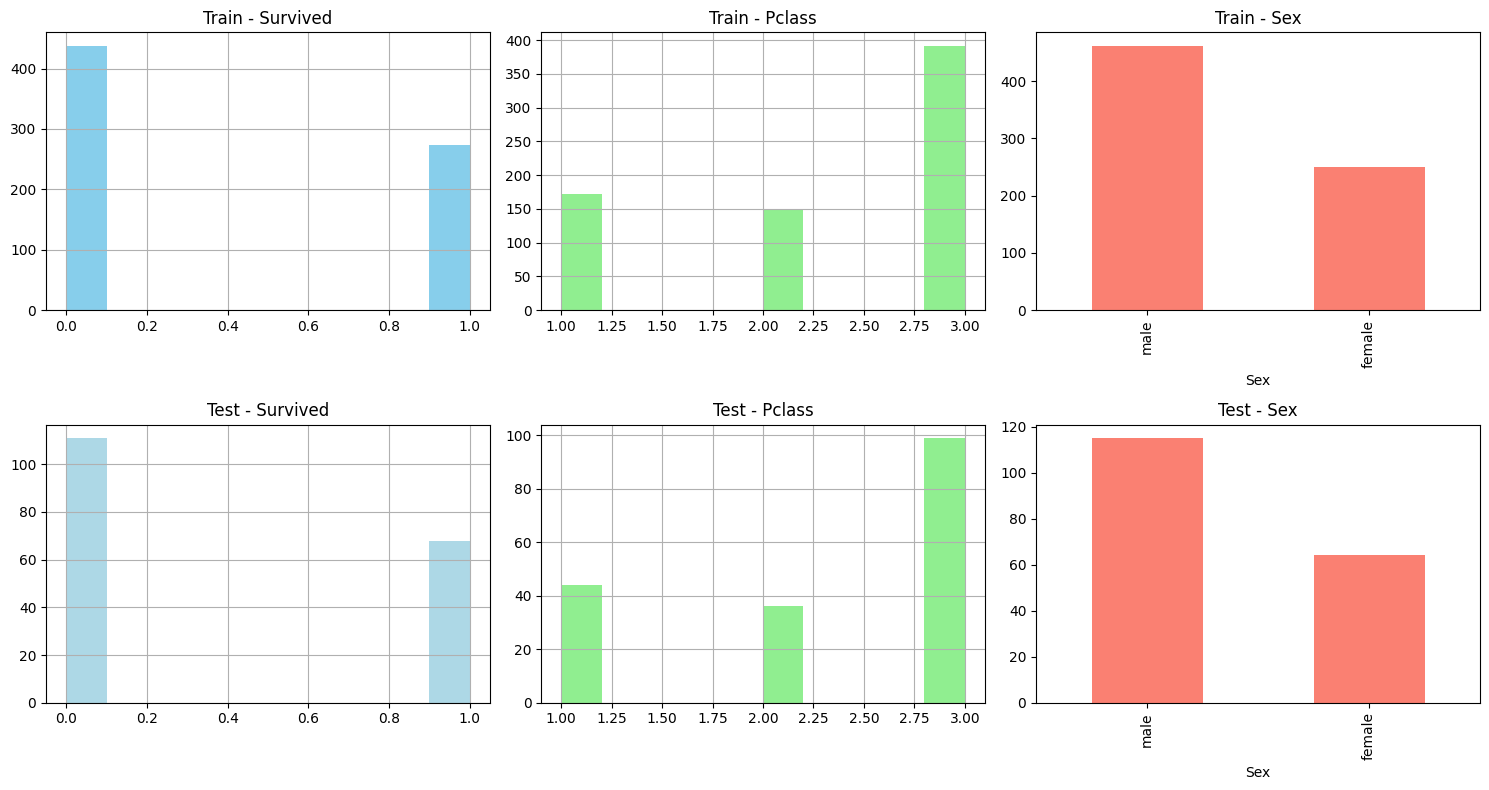

In [ ]:
import matplotlib.pyplot as plt

# Set the figure size to prevent crowding
plt.figure(figsize=(15, 8))

# TRAIN SET PLOTS
plt.subplot(2, 3, 1)
strat_train_set['Survived'].hist(color='skyblue')
plt.title("Train - Survived")

plt.subplot(2, 3, 2)
strat_train_set['Pclass'].hist(color='lightgreen')
plt.title("Train - Pclass")

plt.subplot(2, 3, 3)
strat_train_set['Sex'].value_counts().plot(kind='bar', color='salmon')
plt.title("Train - Sex")

# TEST SET PLOTS
plt.subplot(2, 3, 4)
strat_test_set['Survived'].hist(color='lightblue')
plt.title("Test - Survived")

plt.subplot(2, 3, 5)
strat_test_set['Pclass'].hist(color='lightgreen')
plt.title("Test - Pclass")

plt.subplot(2, 3, 6)
strat_test_set['Sex'].value_counts().plot(kind='bar', color='salmon')
plt.title("Test - Sex")

# Adjust layout
plt.tight_layout()
plt.show()


In [ ]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 1 to 343
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          570 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Cabin        156 non-null    object 
 11  Embarked     710 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.3+ KB


Imputation of Age Column with mean values

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer

class AgeImputer(BaseEstimator, TransformerMixin):
  def fit(self, X, y=None):
    return self

  def transform(self, X):
    imputer = SimpleImputer(strategy='mean')
    X['Age'] = imputer.fit_transform(X[['Age']])
    return X

Label encoding for the Embarking Column

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

class FeatureEncoder(BaseEstimator, TransformerMixin):
  def fit(self, X, y=None):
    return self

  def transform(self, X):
    encoder = OneHotEncoder()
    matrix = encoder.fit_transform(X[['Embarked']]).toarray()

    column_names = ["C", "Q", "S", "N"]

    for i in range(len(matrix.T)):
      X[column_names[i]] = matrix.T[i]

    matrix = encoder.fit_transform(X[['Sex']]).toarray()

    column_names = ["Female", "Male"]

    for i in range(len(matrix.T)):
      X[column_names[i]] = matrix.T[i]
    return X


Drop features that are not important

In [ ]:
class FreatureDropper(BaseEstimator, TransformerMixin):
  def fit(self, X, y=None):
    return self

  def transform(self, X):
    return X.drop(['Name', 'Ticket', 'Cabin', 'Embarked', 'Sex', 'N'], axis=1, errors="ignore")

In [ ]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('age_imputer', AgeImputer()),
    ('feature_encoder', FeatureEncoder()),
    ('feature_dropper', FreatureDropper())
])

In [ ]:
strat_train_set = pipeline.fit_transform(strat_train_set)

In [ ]:
strat_train_set

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female,Male
1,2,1,1,38.000000,1,0,71.2833,1.0,0.0,0.0,1.0,0.0
784,785,0,3,25.000000,0,0,7.0500,0.0,1.0,0.0,0.0,1.0
486,487,1,1,35.000000,1,0,90.0000,0.0,1.0,0.0,1.0,0.0
142,143,1,3,24.000000,1,0,15.8500,0.0,1.0,0.0,1.0,0.0
48,49,0,3,29.518281,2,0,21.6792,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
611,612,0,3,29.518281,0,0,7.0500,0.0,1.0,0.0,0.0,1.0
694,695,0,1,60.000000,0,0,26.5500,0.0,1.0,0.0,0.0,1.0
416,417,1,2,34.000000,1,1,32.5000,0.0,1.0,0.0,1.0,0.0
168,169,0,1,29.518281,0,0,25.9250,0.0,1.0,0.0,0.0,1.0


In [ ]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 1 to 343
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Age          712 non-null    float64
 4   SibSp        712 non-null    int64  
 5   Parch        712 non-null    int64  
 6   Fare         712 non-null    float64
 7   C            712 non-null    float64
 8   S            712 non-null    float64
 9   Q            712 non-null    float64
 10  Female       712 non-null    float64
 11  Male         712 non-null    float64
dtypes: float64(7), int64(5)
memory usage: 72.3 KB


In [ ]:
from sklearn.preprocessing import StandardScaler

X = strat_train_set.drop('Survived', axis=1)
y = strat_train_set['Survived']

scaler = StandardScaler()
X_data = scaler.fit_transform(X)
y_data = y.to_numpy()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

classifier = RandomForestClassifier()
param_grid = [
    {"n_estimators": [10, 100, 200, 500],
     "max_depth": [None, 5, 10],
     "min_samples_split": [2, 3, 4]}
]

grid_search = GridSearchCV(classifier, param_grid, cv=3, scoring='accuracy', return_train_score=True)
grid_search.fit(X_data, y_data)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 100, 200, 500]}],
             return_train_score=True, scoring='accuracy')

In [ ]:
final_classifier = grid_search.best_estimator_
final_classifier

RandomForestClassifier(min_samples_split=4, n_estimators=500)

In [ ]:
strat_test_set = pipeline.fit_transform(strat_test_set)

In [ ]:
strat_test_set

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,Q,S,Female,Male
11,12,1,1,58.000000,0,0,26.5500,0.0,0.0,1.0,1.0,0.0
610,611,0,3,39.000000,1,5,31.2750,0.0,0.0,1.0,1.0,0.0
186,187,1,3,30.414931,1,0,15.5000,0.0,1.0,0.0,1.0,0.0
80,81,0,3,22.000000,0,0,9.0000,0.0,0.0,1.0,0.0,1.0
307,308,1,1,17.000000,1,0,108.9000,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
621,622,1,1,42.000000,1,0,52.5542,0.0,0.0,1.0,0.0,1.0
446,447,1,2,13.000000,0,1,19.5000,0.0,0.0,1.0,1.0,0.0
549,550,1,2,8.000000,1,1,36.7500,0.0,0.0,1.0,0.0,1.0
574,575,0,3,16.000000,0,0,8.0500,0.0,0.0,1.0,0.0,1.0


In [ ]:
X_test = strat_test_set.drop('Survived', axis=1)
y_test = strat_test_set['Survived']

scaler = StandardScaler()
X_test_data = scaler.fit_transform(X_test)
y_test_data = y_test.to_numpy()

In [ ]:
final_classifier.score(X_test_data, y_test_data)

0.7877094972067039

In [ ]:
final_data = pipeline.fit_transform(titanic_data)
final_data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,Q,S,Female,Male
0,1,0,3,22.000000,1,0,7.2500,0.0,0.0,1.0,0.0,1.0
1,2,1,1,38.000000,1,0,71.2833,1.0,0.0,0.0,1.0,0.0
2,3,1,3,26.000000,0,0,7.9250,0.0,0.0,1.0,1.0,0.0
3,4,1,1,35.000000,1,0,53.1000,0.0,0.0,1.0,1.0,0.0
4,5,0,3,35.000000,0,0,8.0500,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.000000,0,0,13.0000,0.0,0.0,1.0,0.0,1.0
887,888,1,1,19.000000,0,0,30.0000,0.0,0.0,1.0,1.0,0.0
888,889,0,3,29.699118,1,2,23.4500,0.0,0.0,1.0,1.0,0.0
889,890,1,1,26.000000,0,0,30.0000,1.0,0.0,0.0,0.0,1.0


In [ ]:
X_final = final_data.drop('Survived', axis=1)
y_final = final_data['Survived']

scaler = StandardScaler()
X_final_data = scaler.fit_transform(X_final)
y_final_data = y_final.to_numpy()

In [ ]:
prod_classifier = RandomForestClassifier()
param_grid = [
    {"n_estimators": [10, 100, 200, 500],
     "max_depth": [None, 5, 10],
     "min_samples_split": [2, 3, 4]}
]

grid_search = GridSearchCV(prod_classifier, param_grid, cv=3, scoring='accuracy', return_train_score=True)
grid_search.fit(X_final, y_final)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 100, 200, 500]}],
             return_train_score=True, scoring='accuracy')

In [ ]:
prod_final_classifier = grid_search.best_estimator_
prod_final_classifier

RandomForestClassifier(max_depth=5, n_estimators=500)

In [ ]:
titanic_test_data = pd.read_csv('/content/drive/MyDrive/Machine_Learning_Projects_Datasets/Titanic_Survical_Case_Study/test.csv')

In [ ]:
titanic_test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
final_test_data = pipeline.fit_transform(titanic_test_data)

In [ ]:
final_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Age          418 non-null    float64
 3   SibSp        418 non-null    int64  
 4   Parch        418 non-null    int64  
 5   Fare         417 non-null    float64
 6   C            418 non-null    float64
 7   Q            418 non-null    float64
 8   S            418 non-null    float64
 9   Female       418 non-null    float64
 10  Male         418 non-null    float64
dtypes: float64(7), int64(4)
memory usage: 36.1 KB


In [ ]:
X_final_test = final_test_data
X_final_test = X_final_test.fillna(method="ffill")

scaler = StandardScaler()
X_data_final_test = scaler.fit_transform(X_final_test)

In [ ]:
predictions = prod_final_classifier.predict(X_data_final_test)

In [ ]:
final_df = pd.DataFrame(titanic_test_data['PassengerId'])
final_df['Survived'] = predictions
final_df.to_csv('/content/drive/MyDrive/Machine_Learning_Projects_Datasets/Titanic_Survical_Case_Study/predictions.csv', index=False)

In [ ]:
final_df

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
